In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# load the dataset
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# scale the numeric features of the dataset using minmax scaler. exclude the Univ feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
crime_scaled = scaler.fit_transform(crime.drop('Unnamed: 0', axis=1))
crime_scaled = pd.DataFrame(crime_scaled, columns=crime.columns[1:])
crime_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [4]:
crime_scaled.describe().round(3)

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,0.421,0.431,0.568,0.360
std,0.262,0.285,0.245,0.242
min,0.000,0.000,0.000,0.000
25%,0.197,0.219,0.381,0.201
50%,0.389,0.390,0.576,0.331
75%,0.630,0.699,0.775,0.488
max,1.000,1.000,1.000,1.000


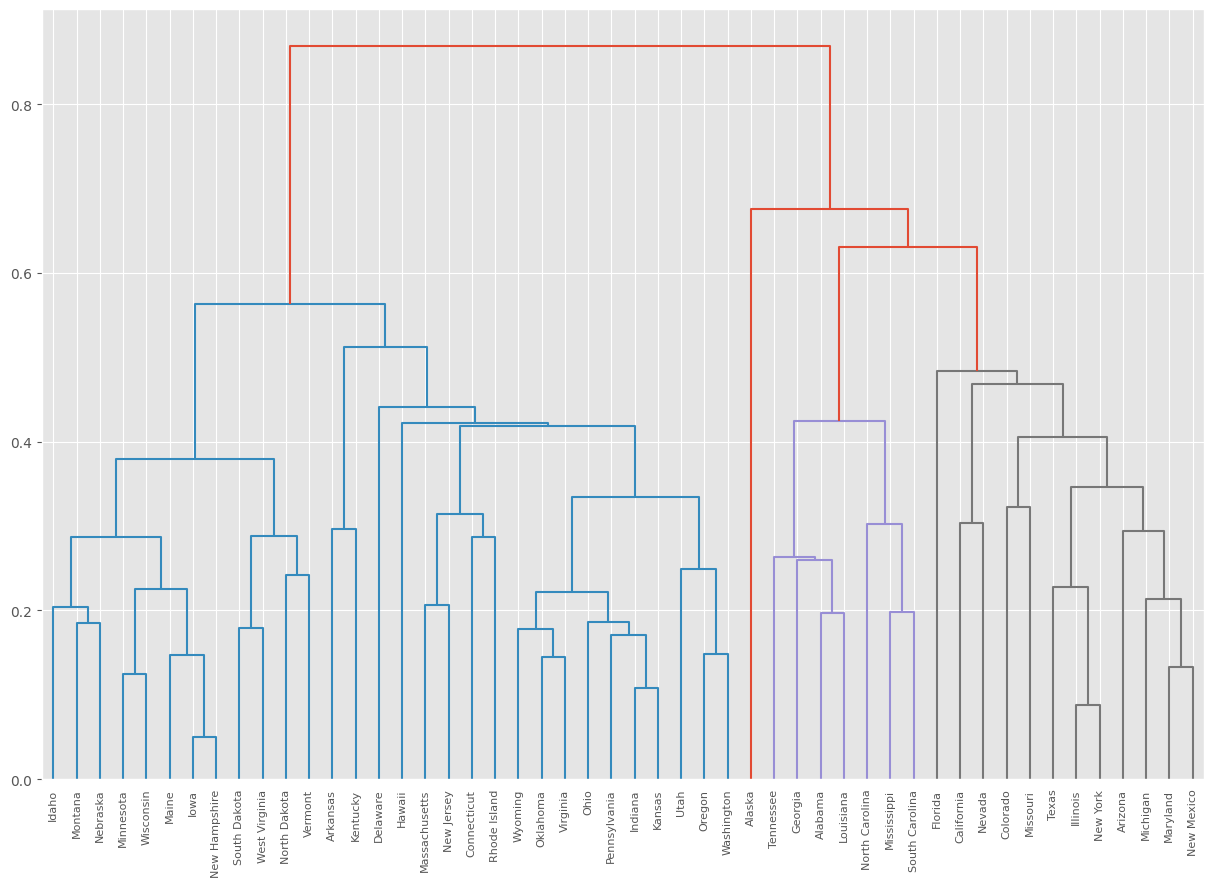

In [5]:
# import dendrogram and linkage from scipy. create linkage object using wards method. display dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(crime_scaled, method='average')
plt.figure(figsize=(15, 10))
dendrogram(link, labels=crime['Unnamed: 0'].values);

In [6]:
# clustering using AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

In [7]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(crime_scaled)
labels

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# add cluster labels to the dataset
crime['cluster_labels'] = labels
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


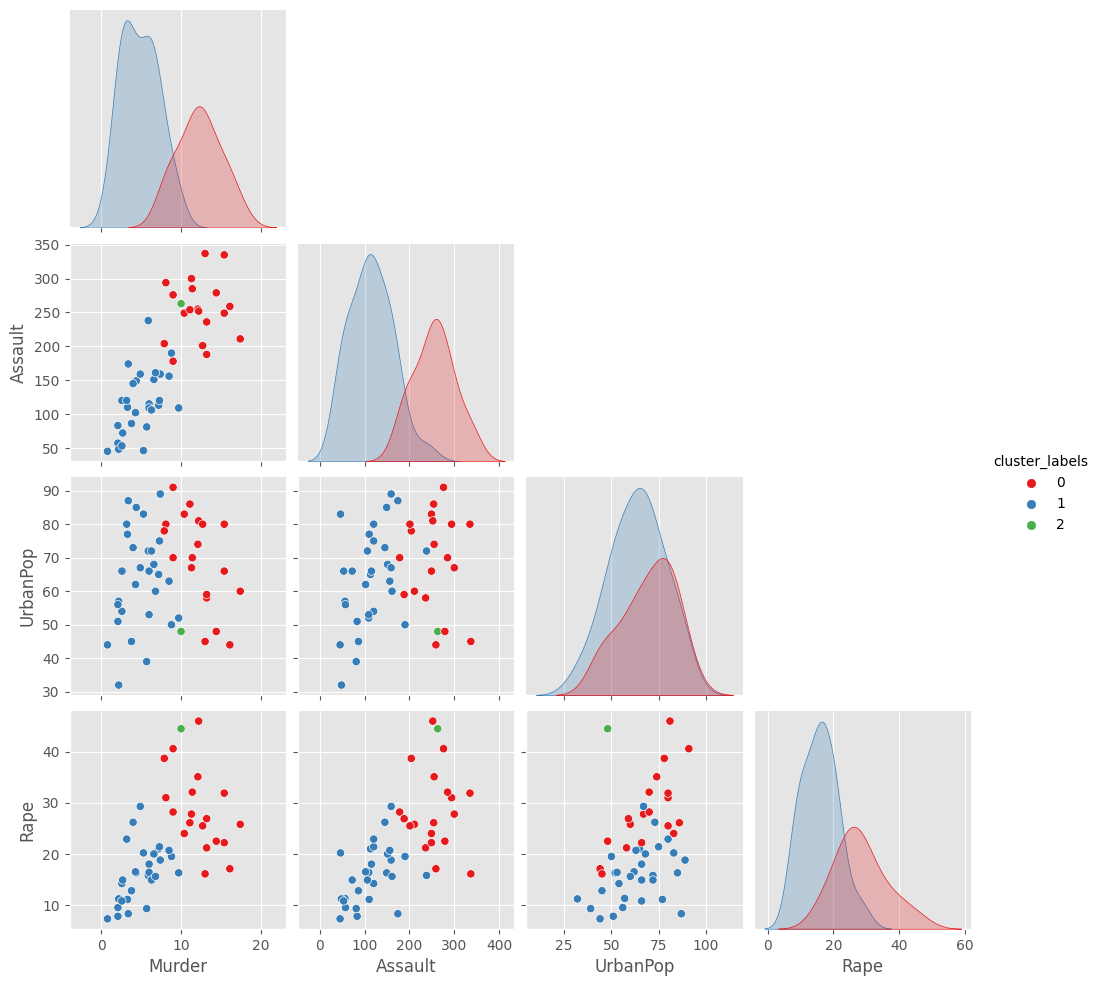

In [9]:
# plot the pairplot with hue based on cluster label
sns.pairplot(crime, hue='cluster_labels', palette='Set1',corner=True);